In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)
import math

In [2]:
data = [0.5, 0.7, 0.8, 1.9, 2.4, 6.1, 6.2, 7.3]

In [3]:
def histogram_estimator(x, data, h, origin):
    lower = ((x-origin)//h)*h + origin
    higher = lower+h
    n = sum(1 for d in data if lower < d <= higher)
    N = len(data)
    return n/(N*h)

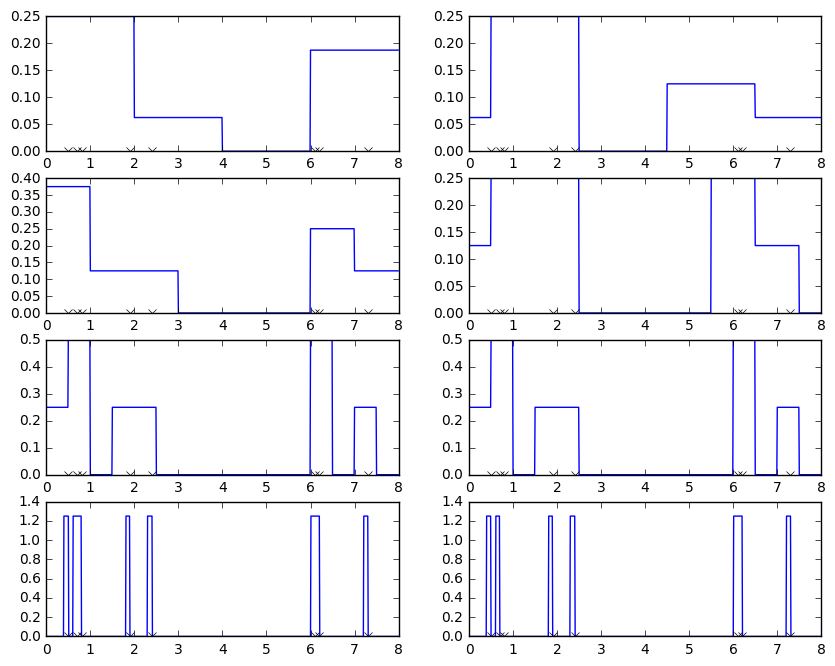

In [4]:
hs = [2, 1, 0.5, 0.1]
origins = [0, 0.5]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    for j, origin in enumerate(origins):
        r = len(hs)
        c = len(origins)
        plt.subplot(r, c, (c*i)+j+1)
        plt.plot(xs, [histogram_estimator(x, data, h, origin) for x in xs])
        plt.plot(data, [0]*len(data), 'xk')
    


In [5]:
def naive_estimator(x, data, h):
    n = sum(1 for d in data if x-h/2 < d <= x+h/2)
    N = len(data)
    return n/(N*h)

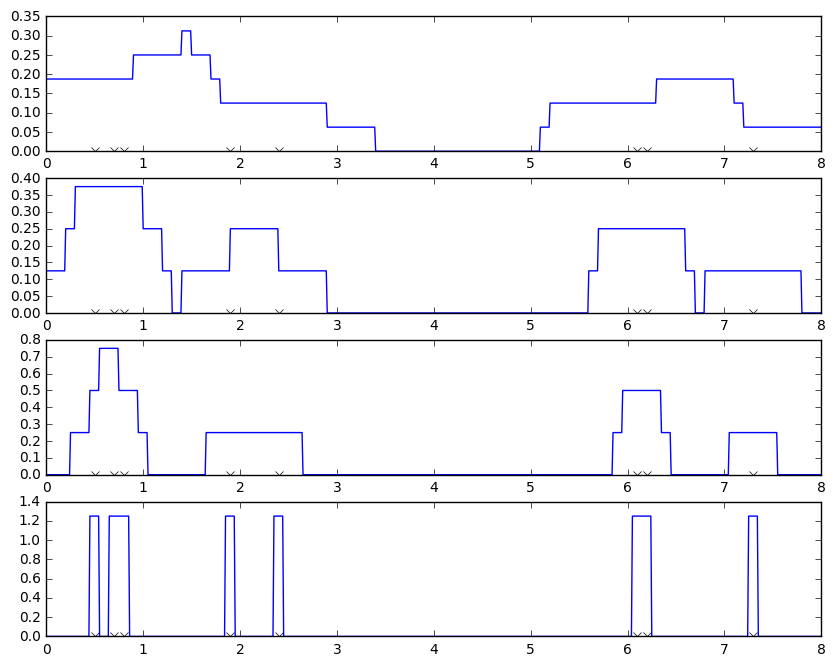

In [6]:
hs = [2, 1, 0.5, 0.1]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    r = len(hs)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [naive_estimator(x, data, h) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')

In [7]:
def gaussian_kernel(u):
    return 1.0/math.sqrt(2*math.pi)*math.exp(-(u*u)/2)

In [8]:
def kernel_estimator(x, data, h, kernel):
    N = len(data)
    return 1/(N*h) * sum(kernel((x-d)/h) for d in data)

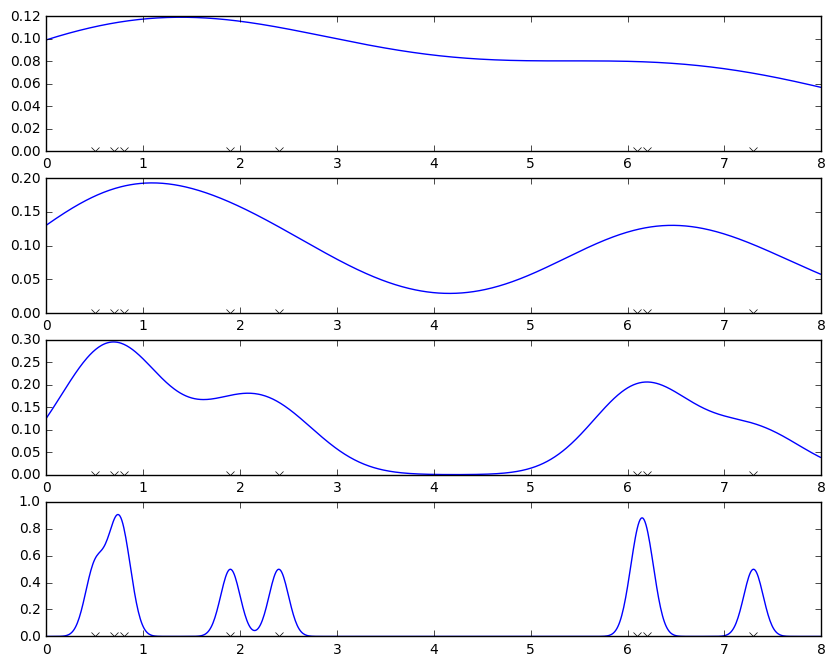

In [9]:
hs = [2, 1, 0.5, 0.1]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    r = len(hs)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [kernel_estimator(x, data, h, gaussian_kernel) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')